In [ ]:
import pickle
import pandas as pd
import numpy
import re
import os
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [1]:
!pip uninstall gensim
!pip install gensim==3.8.3
!pip install nltk

Found existing installation: gensim 3.6.0
Uninstalling gensim-3.6.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/gensim-3.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/gensim/*
Proceed (y/n)? y
  Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 24.2 MB 68.9 MB/s 


In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data = pd.read_csv('/content/drive/MyDrive/data_preprocessed2.csv') #titles without the word "python"

In [17]:
data.head(10)

,tags,is_answered,view_count,answer_count,score,last_activity_date,creation_date,question_id,link,title,accepted_answer_id
0,"['python', 'excel', 'tkinter', 'row', 'openpyxl']",True,46,1,2,4/27/22,4/25/22,72005204,https://stackoverflow.com/questions/72005204/c...,changing row excel file row filled,72005405.0
1,"['python', 'try-catch']",True,47,3,2,4/27/22,4/26/22,72020038,https://stackoverflow.com/questions/72020038/r...,raise string variable exception,NaN
2,"['python', 'matplotlib']",True,9267,3,2,4/27/22,6/21/19,56704699,https://stackoverflow.com/questions/56704699/w...,matplotlib plot kind bar plot different plot,56706020.0
3,"['python', 'datetime', 'date', 'timezone']",True,469727,19,421,4/27/22,12/25/10,4530069,https://stackoverflow.com/questions/4530069/ho...,get value datetime today timezone aware,4530166.0
4,"['python', 'modbus', 'rs485', 'pymodbus']",True,650,2,2,4/27/22,6/17/20,62418945,https://stackoverflow.com/questions/62418945/m...,modbus schneider pm5300,62424060.0
5,['python'],True,34,1,1,4/27/22,4/27/22,72021670,https://stackoverflow.com/questions/72021670/i...,better way compare values,NaN
6,"['python', 'pandas']",True,21,2,0,4/27/22,4/26/22,72020113,https://stackoverflow.com/questions/72020113/f...,fill nan values values previous records data b...,72020143.0
7,"['python', 'terminal', 'output', 'ansi-colors']",True,1907747,56,2785,4/27/22,11/13/08,287871,https://stackoverflow.com/questions/287871/how...,print colored text terminal,NaN
8,"['python', 'linux', 'decimal']",True,871,3,0,4/27/22,4/28/17,43668301,https://stackoverflow.com/questions/43668301/h...,avoid failing decimal function 0 0 occurs,43668900.0
9,"['python', 'anaconda', 'conda', 'geopandas']",True,100417,12,80,4/27/22,2/17/19,54734667,https://stackoverflow.com/questions/54734667/e...,error installing geopandas gdal api version mu...,NaN


In [25]:
data['title'].head()

0              changing row excel file row filled
1                 raise string variable exception
2    matplotlib plot kind bar plot different plot
3        get value datetime today  timezone aware
4                        modbus  schneider pm5300
Name: title, dtype: object

In [21]:
# Assume that all text information is stored in title column of our dataset. Doc2vec requires text to be prepared in a specific way
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
j=0
for em in data['title'].values:
    all_content_train.append(LabeledSentence1(em,[j]))
    j+=1
print("Number of texts processed: ", j)

Number of texts processed:  298024


In [43]:
import smart_open

def read_corpus(fname, tokens_only=False):
        for i, line in enumerate(fname):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [44]:
data.dropna(subset = ["title"], inplace=True)

In [45]:
train_corpus = list(read_corpus(data["title"]))

In [46]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [47]:
model.build_vocab(train_corpus)

In [48]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  


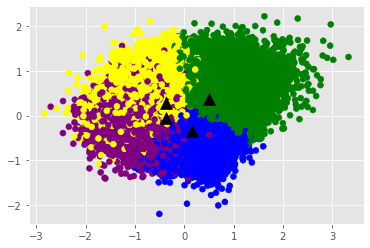

In [50]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100) 
X = kmeans_model.fit(model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(model.docvecs.doctag_syn0)
datapoint = pca.transform(model.docvecs.doctag_syn0)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [51]:
so=pd.DataFrame(list(zip(data['title'],labels)),columns=['title','cluster'])

Cluster: 0
Titles


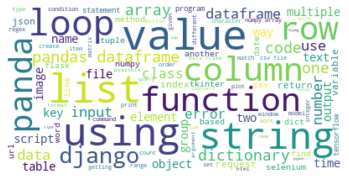

Cluster: 1
Titles


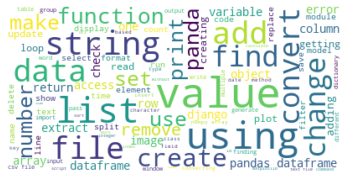

Cluster: 2
Titles


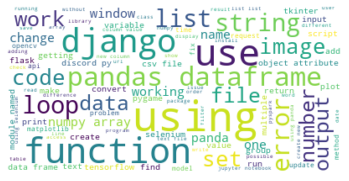

Cluster: 3
Titles


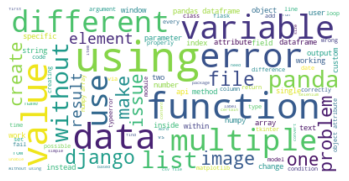

In [56]:
from wordcloud import WordCloud
result={'cluster':labels,'title':data['title']}
result=pd.DataFrame(result)
for k in range(0,4):
   s=result[result.cluster==k]
   text=s['title'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   #text=' '.join([word for word in text.split() if "error" in word and word!="error"])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=so[so.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()